In this notebook we apply spatialDE to identify SVFs 

In [22]:
%pylab inline
import pandas as pd
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
import NaiveDE
import SpatialDE
import scanpy as sc
from scipy.sparse import csr_matrix
import os 

Populating the interactive namespace from numpy and matplotlib


In [23]:
maindir='../../data/unprocessed_adata/'
output_dir='../../data/unprocessed_adata_nuclei/'
files=os.listdir(maindir)
files=['ms_brain_multisection1.h5ad',
       'human_brain.h5ad',
 'ms_brain_multisection2.h5ad',
 'ms_brain_multisection3.h5ad',
'realmouse_1.h5ad',
 'realmouse_2.h5ad',
 'realmouse_3.h5ad',
 'realmouse_4.h5ad',
#    'hbreast_idc_addon_set1.h5ad',
# 'hbreast_idc_addon_set2.h5ad',
# 'hbreast_idc_addon_set4.h5ad',
# 'hbreast_idc_entiresample_set3.h5ad',
 'hbreast_ilc_addon_set2.h5ad',
 'hbreast_ilc_addon_set4.h5ad',
 'hbreast_ilc_entiresample_set3.h5ad',
 'healthy_lung.h5ad',
 'human_alzheimers.h5ad',
 'human_gbm.h5ad',
 'human_spinal_chord_active.h5ad',
 'human_spinal_chord_inactive.h5ad',
 'h_breast_1.h5ad',
 'h_breast_2.h5ad',
 'lung_cancer.h5ad',
 'ms_brain_fullcoronal.h5ad',
 'ms_brain_partialcoronal.h5ad',
 ]

In [24]:
for f in files:
    try:
        print(f)
        adata=sc.read(output_dir+f)
        adata.obsm["spatial"]=np.array([adata.obs.x_centroid,adata.obs.y_centroid]).transpose().astype('float32')
        #adata.X=adata.layers['raw']
        adata1=adata
        import random
        some=random.sample(range(0,adata1.shape[0]),5000)
        adata1=adata1[some,:]
        counts=pd.DataFrame(adata1.X.toarray(),columns=adata1.var.index)
        sample_info = adata1.obs
        sample_info=sample_info.reset_index()
        counts = counts.loc[sample_info.index]  # Align count matrix with metadata table
        sample_info.head(5)
        sample_info['x']=sample_info['x_centroid']
        sample_info['y']=sample_info['y_centroid']
        norm_expr = NaiveDE.stabilize(counts.T).T
        resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T
        X = sample_info[['x', 'y']]
        #X=X.astype('float16')
        result = SpatialDE.run(X, resid_expr)
        result.index=result['g']
        result['rank']=result.loc[:,['LLR']].rank()
        result=result.loc[:,['pval','qval','rank']]
        result.columns=['Pval','FDR','rank']
        result.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__spatialde.csv')
    except:
        print('not possible')

ms_brain_multisection1.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

human_brain.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

ms_brain_multisection2.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

ms_brain_multisection3.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

realmouse_1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


not possible
realmouse_2.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

realmouse_3.h5ad
not possible
realmouse_4.h5ad
not possible
hbreast_ilc_addon_set2.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

hbreast_ilc_addon_set4.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

hbreast_ilc_entiresample_set3.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

healthy_lung.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

human_alzheimers.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

human_gbm.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

human_spinal_chord_active.h5ad
not possible
human_spinal_chord_inactive.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

h_breast_1.h5ad
not possible
h_breast_2.h5ad
not possible
lung_cancer.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

ms_brain_fullcoronal.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

ms_brain_partialcoronal.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

In [7]:
sample_info.shape

(315, 22)

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

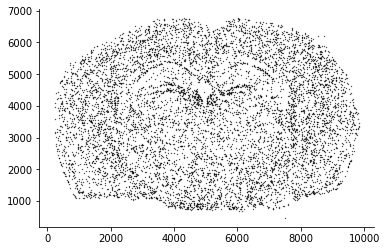

In [12]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k',s=0.1);
plt.axis('equal');

In [8]:
f='ms_brain_multisection1.h5ad'

In [12]:
print(f)
adata=sc.read(output_dir+f)

ms_brain_multisection1.h5ad


In [13]:
cells=[500,1000,5000,10000]#,50000,100000]

In [14]:
import time

In [15]:
times=[]
for cel in cells:
    print(cel)
    start_time = time.time()
    print(f)
    adata=sc.read(output_dir+f)
    adata.obsm["spatial"]=np.array([adata.obs.x_centroid,adata.obs.y_centroid]).transpose().astype('float32')
    #adata.X=adata.layers['raw']
    adata1=adata
    import random
    some=random.sample(range(0,adata1.shape[0]),int(cel))
    adata1=adata1[some,:]
    counts=pd.DataFrame(adata1.X.toarray(),columns=adata1.var.index)
    sample_info = adata1.obs
    sample_info=sample_info.reset_index()
    counts = counts.loc[sample_info.index]  # Align count matrix with metadata table
    sample_info.head(5)
    sample_info['x']=sample_info['x_centroid']
    sample_info['y']=sample_info['y_centroid']
    norm_expr = NaiveDE.stabilize(counts.T).T
    resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T
    X = sample_info[['x', 'y']]
    #X=X.astype('float16')
    result = SpatialDE.run(X, resid_expr)
    result.index=result['g']
    result['rank']=result.loc[:,['LLR']].rank()
    result=result.loc[:,['pval','qval','rank']]
    result.columns=['Pval','FDR','rank']
    end_time = time.time()
    times.append(end_time - start_time)
    print(times)

500
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:281: RuntimeWarning: divide by zero encountered in log
  max_ll = -0.5 * ( n * np.log(max_s2_e_hat) + sum1 / max_s2_e_hat + n * np.log(2 * np.pi) )
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:281: RuntimeWarning: invalid value encountered in double_scalars
  max_ll = -0.5 * ( n * np.log(max_s2_e_hat) + sum1 / max_s2_e_hat + n * np.log(2 * np.pi) )
/home/sergio/anaconda3/envs/xb

Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

[20.52544355392456]
1000
ms_brain_multisection1.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

[20.52544355392456, 22.866042137145996]
5000
ms_brain_multisection1.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

[20.52544355392456, 22.866042137145996, 139.9751489162445]
10000
ms_brain_multisection1.h5ad


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

[20.52544355392456, 22.866042137145996, 139.9751489162445, 709.0320587158203]


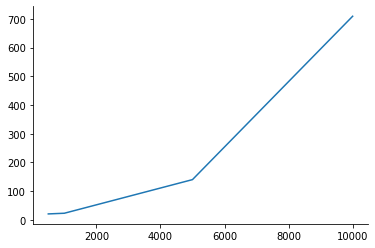

In [19]:
timesres=pd.DataFrame([cells,times],index=['cells','times_spatialDE']).transpose()
plt.plot(list(timesres['cells'].astype(int)),list(timesres['times_spatialDE'].astype(float)))
timesres.to_csv('../../figures/times_svf/spatialde_times.csv')